In [1]:
import numpy as np
from nirs_data_class import NIRSData
import matplotlib.pyplot as plt
import filter as ft

In [2]:
filepath = "/mnt/data/NIRS/data/sub-002/sub-002.nirs"

data = NIRSData()
data.default_labels['src'] = ''
data.default_labels['det'] = ''
data.read_homer2(filepath=filepath)
data.paradigm_make_block_design(block_length=20, conditions=[1])

INFO:nirs_data:Processing nirs file: /mnt/data/NIRS/data/sub-002/sub-002.nirs
INFO:nirs_data:16 sources, 16 detectors found
INFO:nirs_data:Sampling frequency: 7.81 Hz
INFO:nirs_data:Absorption coefficients loaded from: extinction_coeff.txt
INFO:nirs_data:Delta OD successfully converted to O2Hb and HHb concentraion changes. 46 channels, 8454 timepoints loaded
INFO:nirs_data:Recording time: 1082.46 s


INFO:nirs_data:34 motion artifacts found on channel 0
INFO:nirs_data:19 motion artifacts found on channel 1
INFO:nirs_data:25 motion artifacts found on channel 2
INFO:nirs_data:91 motion artifacts found on channel 3
INFO:nirs_data:67 motion artifacts found on channel 4
INFO:nirs_data:8 motion artifacts found on channel 5
INFO:nirs_data:86 motion artifacts found on channel 6
INFO:nirs_data:59 motion artifacts found on channel 7
INFO:nirs_data:12 motion artifacts found on channel 8
INFO:nirs_data:36 motion artifacts found on channel 9
INFO:nirs_data:16 motion artifacts found on channel 10
INFO:nirs_data:75 motion artifacts found on channel 11
INFO:nirs_data:57 motion artifacts found on channel 12
INFO:nirs_data:19 motion artifacts found on channel 13
INFO:nirs_data:49 motion artifacts found on channel 14
INFO:nirs_data:78 motion artifacts found on channel 15
INFO:nirs_data:43 motion artifacts found on channel 16
INFO:nirs_data:59 motion artifacts found on channel 17
INFO:nirs_data:89 mot

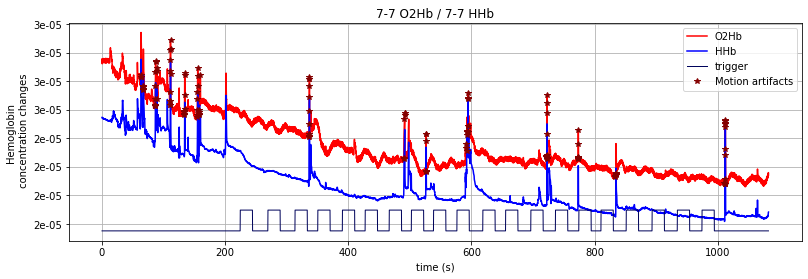

In [3]:
data.find_motion_artifacts(mode="variance", discr_factor=3)
data.plot_data(channels=["7-7"])

In [4]:
data.remove_motion_artifacts(seg_len=3, var_limit=0.99)

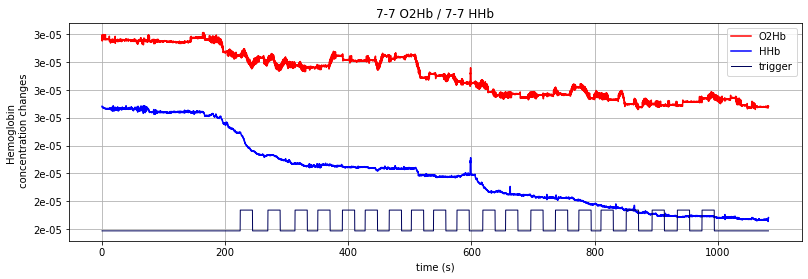

In [5]:
data.plot_data(range_low = int(0*data.fs), range_high=int(0*data.fs), channels=["7-7"])

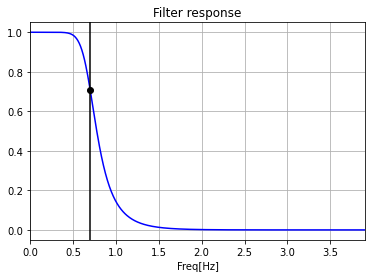

In [7]:
ft.plot_lowpass_response(cutoff=0.7, fs=data.fs, order=5)

In [8]:
data.oxyChannels = ft.butter_lowpass_filter(data.oxyChannels, cutoff = 0.7, fs=data.fs, order=5)
data.deoxyChannels = ft.butter_lowpass_filter(data.deoxyChannels, cutoff = 0.7, fs=data.fs, order=5)

#data.oxyChannels = ft.butter_bandpass_filter(data.oxyChannels, cut_low=0.05, cut_high=0.7, fs=data.fs, order=5)
#data.deoxyChannels = ft.butter_bandpass_filter(data.deoxyChannels, cut_low=0.05, cut_high=0.7, fs=data.fs, order=5)

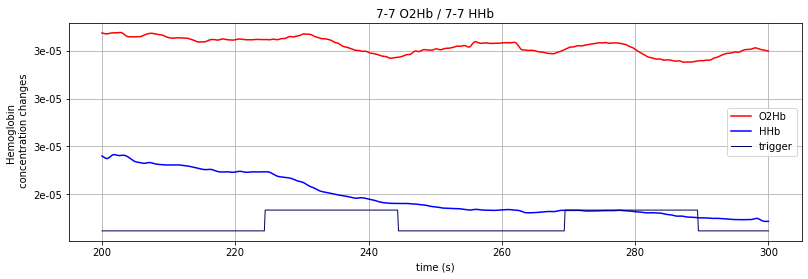

In [9]:
data.plot_data(range_low = 200, range_high=300, channels=["7-7"])

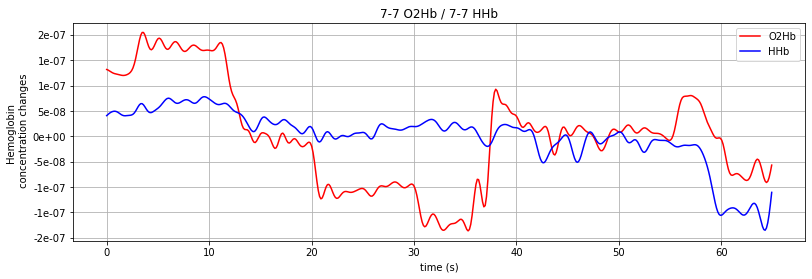

In [13]:
data.plot_data(channels=["7-7"], mode="average", condition=0)